# Kaggle Titanic Project

In [28]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#load data
titanic_df = pd.read_csv('train.csv')
#preview data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [29]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


# Who were the passengers on the titanic ? ( Age, Gender, Class...etc ) 

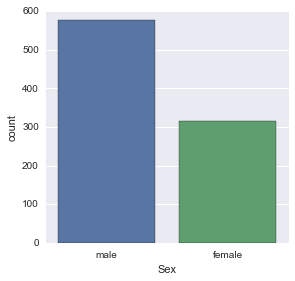

In [31]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.factorplot('Sex',data=titanic_df, kind='count')

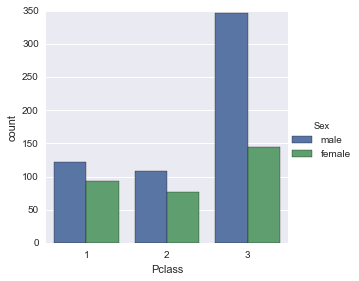

In [32]:

sns.factorplot('Pclass',data=titanic_df, kind='count', hue='Sex')

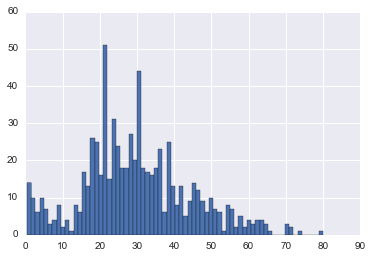

In [35]:
def male_or_female_or_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_or_female_or_child, axis=1)
titanic_df['Age'].hist(bins=70)


In [36]:
titanic_df['Age'].mean()

29.69911764705882

In [37]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

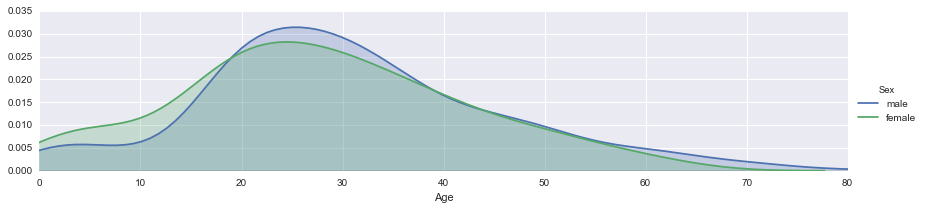

In [38]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age',shade='True')
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

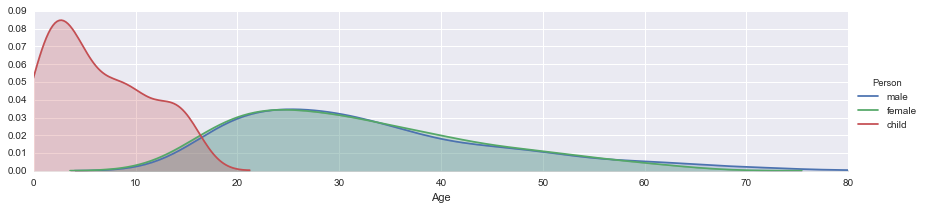

In [39]:
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age',shade='True')
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

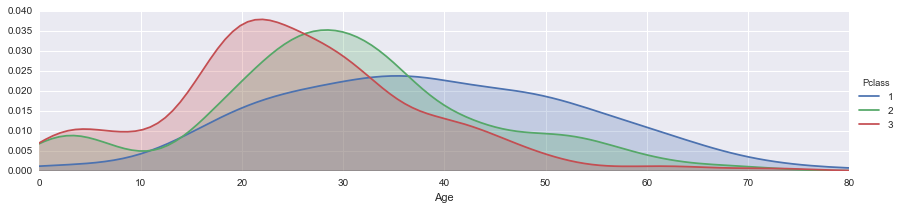

In [40]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age',shade='True')
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

# What deck were the passengers on and how does that relate to their class ?

In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [43]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

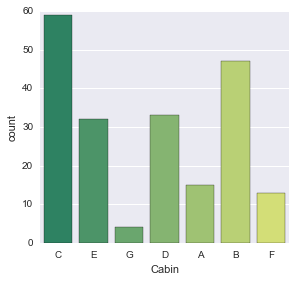

In [57]:
levels = []
for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.head()
cabin_df.columns = ['Cabin']
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,kind='count', palette='summer')
    

In [55]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


# Where did the passengers come from ? ( Port of Embarkation )

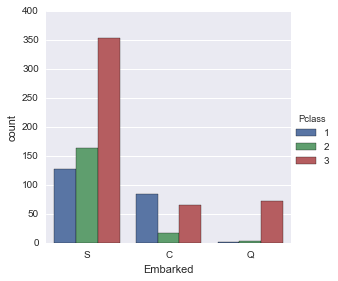

In [58]:
sns.factorplot('Embarked',data=titanic_df, hue='Pclass',kind='count')

In [ ]:
#Q = Queenstown
#S = Southampton
#C = Cherbourg

# Who was alone and who was with family ?

In [60]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0


In [61]:
titanic_df['Alone'].loc[titanic_df.Alone > 0 ] = 'With Family'
titanic_df['Alone'].loc[titanic_df.Alone == 0 ] = 'Alone'

C:\Users\ajay\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


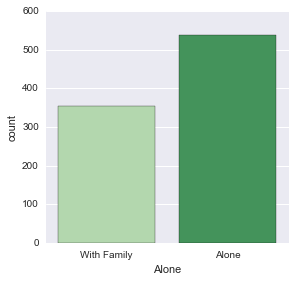

In [64]:
sns.factorplot('Alone', data=titanic_df,palette='Greens', kind='count')

# What factors helps survive someone on the sinking titanic ?

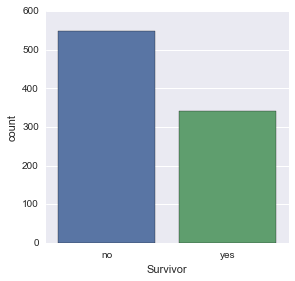

In [66]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
sns.factorplot('Survivor', data=titanic_df, kind='count')

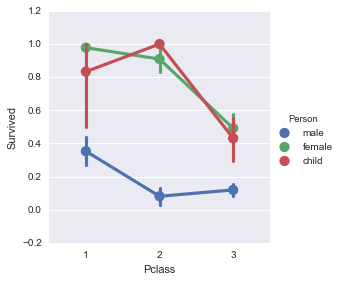

In [69]:
sns.factorplot('Pclass', 'Survived' ,hue='Person',data=titanic_df)

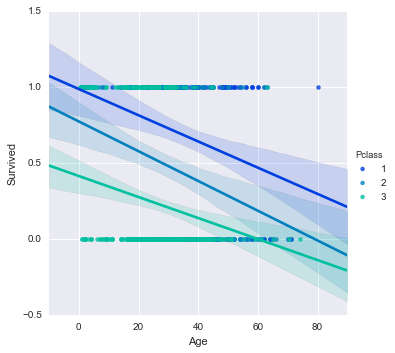

In [72]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df, palette='winter')

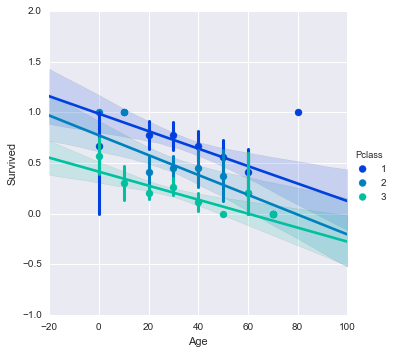

In [73]:
generations = [0,10,20,30,40,50,60,70,80,90,100]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df, palette='winter', x_bins = generations)

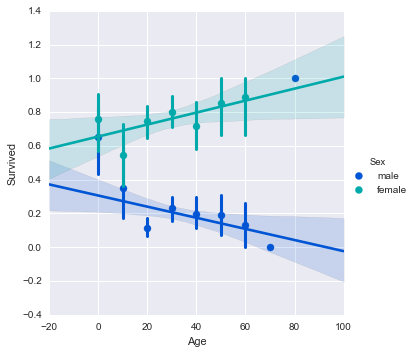

In [74]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df, palette='winter', x_bins = generations)

# Did the deck have an effect on the survival rate ?

In [76]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivior,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no,no


In [86]:
titanic_df_cabin = titanic_df.dropna()

def set_deck(cabin):
    deck = cabin[0][0]
    return deck


titanic_df_cabin['Deck'] = titanic_df_cabin[['Cabin']].apply(set_deck, axis=1)

C:\Users\ajay\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [87]:
titanic_df_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivior,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone,no,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,child,With Family,yes,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,female,Alone,yes,yes,C


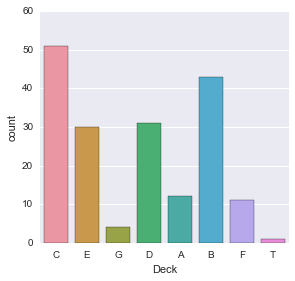

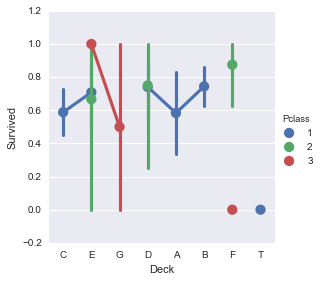

In [95]:
sns.factorplot('Deck',data=titanic_df_cabin,kind='count')
sns.factorplot('Deck','Survived',data=titanic_df_cabin, hue='Pclass')

# Did being with family help survival rate ?

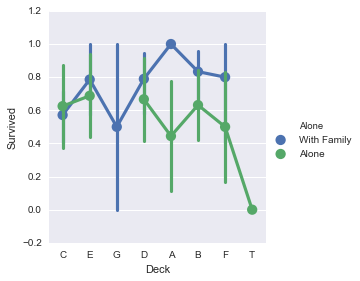

In [93]:
sns.factorplot('Deck','Survived',data=titanic_df_cabin, hue='Alone')

In [ ]:
#Summary
Passengers 